# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 6. Supervised learning. Session 4

This unit is organized as follows:

- Introduction.pptx
- Feedforward Neural Networks.pdf
- ANN Neural Networks and Back-Propagation.pdf
- Examples...

In [15]:
#Example from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Generates a random n-class classification problem:
X, y = make_classification(n_samples=100, random_state=1)
print(X)
print(y)

#The stratify parameter makes a split so that the proportion of values in the sample produced 
#will be the same as the proportion of values provided to parameter stratify.
#For example, if variable y is a binary categorical variable with values 0 and 1 
#and there are 25% of zeros and 75% of ones, stratify=y will make sure that 
#your random split has 25% of 0's and 75% of 1's.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

#random_state = 1. Determines random number generation for weights and bias initialization:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train) 

#Predict the probabilities of the first sample in X_test:
print(clf.predict_proba(X_test[:1]))

#Classify the five first samples:
print(clf.predict(X_test[:5, :]))

#Model accuracy:
print(clf.score(X_test, y_test))

[[ 0.6065484   0.81695766  1.05132077 ... -0.36453805  0.16466507
  -0.76780375]
 [-3.05376438  0.92116205 -1.45832446 ...  0.20437739 -1.55269878
  -0.4466992 ]
 [ 0.60640394  0.68064537  1.02124813 ...  1.03703898 -0.83001099
  -0.03599018]
 ...
 [-2.30803851 -1.42368943  1.14256392 ... -0.24701649 -0.37911961
   0.27610275]
 [-1.53702887  2.14957042  0.32455352 ...  2.15323347  1.31972591
  -0.8797298 ]
 [ 0.37167029 -0.95543218 -0.1484898  ... -0.6294416   0.14225137
   0.78002714]]
[1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]
[[0.03838405 0.96161595]]
[1 0 1 0 1]
0.88


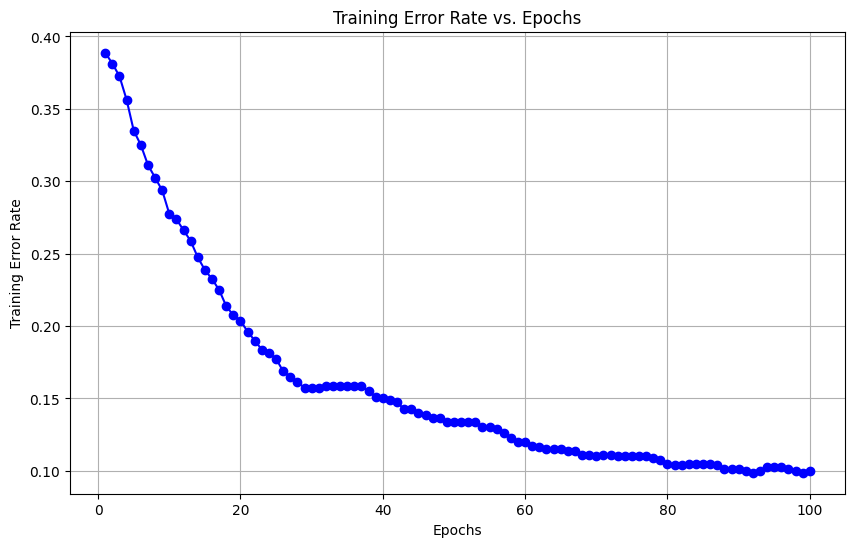

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and validation sets
split_ratio = 0.8
split_idx = int(split_ratio * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=100, random_state=42)

# Lists to store training error per epoch
train_errors = []

# Training loop
for epoch in range(mlp.max_iter):
    # Train the model for one epoch
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train)) # np.unique ensures that all unique classes present in y_train are considered during training.
    
    # Make predictions on the training data for this epoch
    y_train_pred = mlp.predict(X_train)
    
    # Calculate the training error (1 - accuracy)
    train_error = 1.0 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)

# Plot the training error over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, mlp.max_iter + 1), train_errors, marker='o', linestyle='-', color='blue')
plt.title('Training Error Rate vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Error Rate')
plt.grid()
plt.show()


In [16]:
#Example from https://edisciplinas.usp.br/pluginfile.php/4140540/mod_resource/content/1/mlp.pdf
import numpy as np
from sklearn.neural_network import MLPClassifier

# Setting the input samples.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Setting the expected outputs.
y_XOR = np.array([0, 1, 1, 0])

#hidden_layer_sizes=(5,) if you want only 1 hidden layer with 5 hidden units.
mlp = MLPClassifier(hidden_layer_sizes=(5,),
activation='tanh', max_iter=10000, random_state=10)
mlp.fit(X, y_XOR) 
#Predict the proabilities for each sample in X.
pred = mlp.predict_proba(X)
print("MLP's XOR probabilities:\n[class0, class1]\n{}".format(pred))

MLP's XOR probabilities:
[class0, class1]
[[0.90824236 0.09175764]
 [0.08283202 0.91716798]
 [0.04569506 0.95430494]
 [0.95730544 0.04269456]]


In [17]:
#Example from https://edisciplinas.usp.br/pluginfile.php/4140540/mod_resource/content/1/mlp.pdf

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#First of all, we load the dataset, encode its labels as int values and split it into training and test sets.

# Loading Breast Cancer dataset.
data = pd.read_csv('breast_cancer.csv')
# Creating a LabelEncoder and transforming the dataset labels.
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['diagnosis'].values)
print(data['diagnosis'].values)
print(y)
# Extracting the instances data.
X = data.drop('diagnosis', axis=1).values
print(X)
# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=10)

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'malignant' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'benign' 'malignant' 'malignant' 'malignant'
 'benign' '

In [18]:
#tangent hyperbolic function (tanh)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh',
max_iter=10000, random_state=10)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print("MLP's accuracy score: {}".format(accuracy))

MLP's accuracy score: 0.6288659793814433


In [22]:
#We can observe that its accuracy score was rather low. 
#Unfortunately, MLPs are very sensitive to different feature scales. 
#So, it is normally necessary to normalize or rescale the input data.

#Creating a StandardScaler. This object normalizes features to zero mean and unit variance.
#      y = (x – mean) / standard_deviation
#      Where the mean is calculated as: mean = sum(x) / count(x)
#      And the standard_deviation is calculated as:
#      standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train)
# Normalizing train and test data.
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test) # Training MLP with normalized data.
mlp.fit(X_train_scaled, y_train)
# Testing MLP with normalized data.
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) 
print("MLP's accuracy score: {}".format(accuracy))

MLP's accuracy score: 0.979381443298969


In [12]:
import pandas as pd

file = "iris.csv"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#Add the column names at the top:
irisdata = pd.read_csv(file, names=names)  

X = irisdata.iloc[:, 0:4]
print(X)

#select_dtypes: returns a subset of the DataFrame’s columns based on the column dtypes.
y = irisdata.select_dtypes(include=[object])
print(y)

from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform) 
print(y)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())

print("Accuracy: ",mlp.score(X_test, y_test))

print("Prediction: ",mlp.predict([[5.3, 3.5, 1.6, 0.3]]))  

     sepal-length  sepal-width  petal-length  petal-width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
         Class
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]
     Class
0        0
1        0
2        0
3        0
4        0
..     ...

/home/jupyter-admin3/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
